In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Wisconsin\BreastCancer.csv', index_col=0)
df.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [47]:
df.shape

(699, 10)

In [48]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [49]:
s_scalar = StandardScaler().set_output(transform='pandas')
df_scl = s_scalar.fit_transform(X)

pca = PCA().set_output(transform='pandas')
pca_df = pca.fit_transform(df_scl)
pca_df #Eigen vector

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
61634,-0.661561,-0.168216,0.583962,-0.439347,-0.230526,0.130653,-0.097528,0.541727,0.328081
63375,2.178759,-0.693348,0.432389,1.192376,-1.074153,-0.442691,-0.702441,-1.787781,-0.244667
76389,1.404956,-1.364750,1.761714,0.878367,0.013219,-0.517801,0.835375,0.408381,-0.565653
95719,6.073098,1.994961,-1.081435,0.237234,-0.141189,0.019790,-0.355352,0.444035,-0.062628
128059,-1.237518,-0.370332,-0.823064,0.473932,-0.127604,-1.151372,0.508269,-0.344131,0.029906
...,...,...,...,...,...,...,...,...,...
1369821,6.473443,1.285709,0.048059,0.936819,-1.446932,0.152226,0.731058,0.235807,-0.042668
1371026,4.097345,-0.215083,-1.078721,0.912918,0.027151,0.599090,-0.276698,1.705969,0.099999
1371920,-1.351669,-0.095164,0.536224,-0.120275,-0.359013,0.101649,0.178219,-0.452815,0.002252


In [50]:
var_cov = np.cov(df_scl.T)
value, vectors = np.linalg.eig(var_cov)


# Varicance and scores are similar
pd.DataFrame([value, pca_df.var()], index=['engen values', 'pca scores']).T

,engen values,pca scores
0,5.899333,5.899333
1,0.777475,0.777475
2,0.539624,0.539624
3,0.088819,0.462914
4,0.462914,0.380272
5,0.380272,0.305723
6,0.262712,0.296021
7,0.305723,0.262712
8,0.296021,0.088819


In [51]:
# Total variation
total_variation = pca_df.var().sum()

In [52]:
pca_df.var()/total_variation * 100

pca0    65.454375
pca1     8.626251
pca2     5.987245
pca3     5.136127
pca4     4.219201
pca5     3.392065
pca6     3.284417
pca7     2.914850
pca8     0.985468
dtype: float64

In [53]:
pca.explained_variance_ratio_*100

array([65.45437483,  8.62625123,  5.98724547,  5.13612665,  4.21920122,
        3.39206535,  3.28441735,  2.91485025,  0.98546764])

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='UniCell_Size', ylabel='SEpith'>

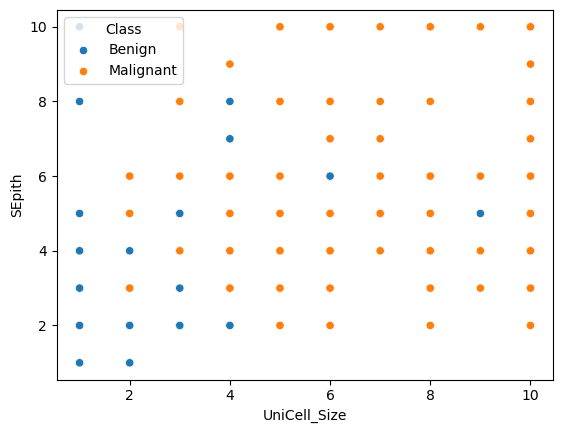

In [55]:
sns.scatterplot(x='UniCell_Size', y='SEpith', hue='Class', data=df)

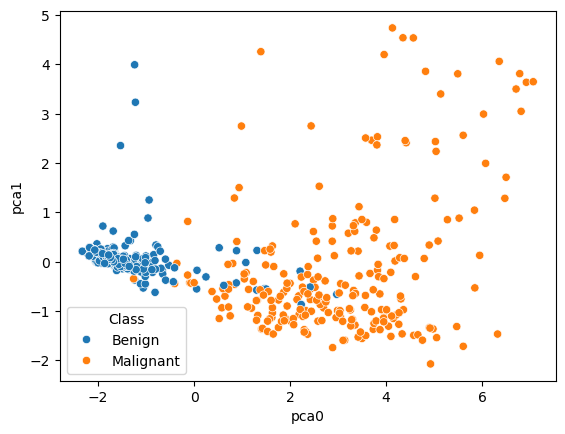

In [56]:
df_of_pca = pca_df.copy()
df_of_pca['Class'] = df['Class'].astype('category')


sns.scatterplot(x='pca0', y='pca1', hue='Class', data=df_of_pca)  
plt.show()

---
### PCA + Logistic Regression ### 
Using with **supervised learning**


In [73]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Wisconsin\BreastCancer.csv', index_col=0)
df.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [74]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [77]:
s_scalar = StandardScaler().set_output(transform='pandas')
pca = PCA(n_components=5).set_output(transform='pandas')

log_reg = LogisticRegression(random_state=24)


pipe_pca = Pipeline([
    ('scale', s_scalar),
    ('pca', pca),
])



X_train_pca = pipe_pca.fit_transform(X_train)
log_reg.fit(X_train_pca, y_train)

X_test_pca = pipe_pca.transform(X_test)
y_pred = log_reg.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.9761904761904762
